<a href="https://colab.research.google.com/github/0xQuirKai/Kaggel-Spaceship-Titanic-classifier/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import what we need

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#Readind the Data

In [3]:
train = pd.read_csv("train.csv")
## split train data into train and validate(test)
X_train, X_test ,y,y_test = train_test_split(train,train['Transported'], test_size=0.2, random_state=42)


#**Heat map of the corrleation Matrix**

<ipython-input-9-b7d2a2a38b03>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


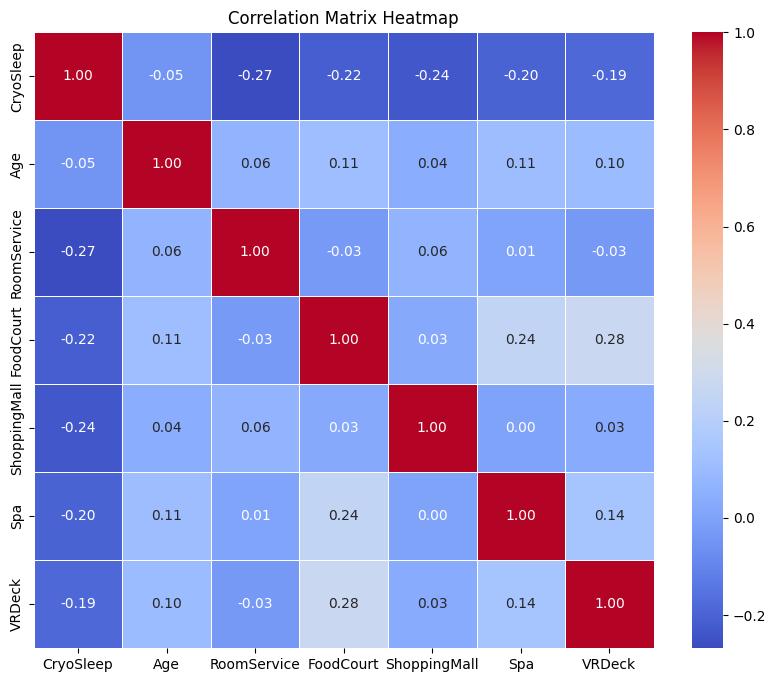

In [9]:
# Create a heatmap
## in fact this corr matrix is only for the numeric values in the DataFrame but there's some no-numeric values
## i already preprocessed that data and figure out that they have'nt that much of corr so i droped them
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#**Preprocessing of the Data**

In [4]:
def one_hot(X):
  X['CryoSleep'].fillna(X['CryoSleep'].mode()[0], inplace=True)
  X['RoomService'].fillna(X['RoomService'].mode()[0], inplace=True)
  X['Spa'].fillna(X['Spa'].mode()[0], inplace=True)
  X['VRDeck'].fillna(X['VRDeck'].mode()[0], inplace=True)
  X['CryoSleep'] = X['CryoSleep'].astype(int)
  X['Spa'] = X['Spa'].astype(int)
  X['VRDeck'] = X['VRDeck'].astype(int)
  X['RoomService'] = X['RoomService'].astype(int)
  X = X.drop(columns=['Cabin','Name','HomePlanet','Destination','VIP','ShoppingMall','FoodCourt'],axis=1)
  X['Age']=X['Age'].fillna(X['Age'].mean())
  if 'Transported' in X.columns :
    X = X.drop(columns=['Transported'],axis=1)
  X = np.asarray(X).astype(np.int32)

  return X
X_train = one_hot(X_train)
X_test = one_hot(X_test)


#From Boolean to int (0,1) for the labels

In [5]:
y = y.astype(int)
y_test = y_test.astype(int)

# Standardize features by removing the mean and scaling to unit variance.


In [6]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



#MODEL :

In [ ]:

model2 = tf.keras.Sequential([
      tf.keras.layers.Dense(6) ,
      tf.keras.layers.Dense(1,activation='sigmoid')

])

# Uncomment the below line if you want to add callback for the lr
# traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

##lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# Assuming you have a model named 'model' and you are training it

# Compile the model
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

history = model2.fit(X_train, y, epochs=100,batch_size=256, validation_data=(X_test, y_test),verbose=1)

#Evaluate the model on the test set
y_pred = (model2.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

#Predict the test Data and the submission file creation

In [ ]:

test = train = pd.read_csv("test.csv")
X_test_new = one_hot(test)

sc = StandardScaler()
X_test_new = sc.fit_transform(X_test_new)

# Make predictions on the preprocessed test data
predictions = model2.predict(X_test_new)

# Convert predictions to binary labels using a threshold (e.g., 0.5)
binary_predictions = (predictions > 0.5).astype(bool)

# Create a submission DataFrame
submission_df = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': binary_predictions.flatten()})

# Save the submission file
submission_df.to_csv('my_submission.csv', index=False)
from google.colab import files

# Specify the file path
file_path = 'my_submission.csv'

# Download the file
files.download(file_path)
